<a href="https://colab.research.google.com/github/Giffy/Mobility_AIBCN/blob/master/3_Dataset_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset creation

Creation of mobile phone density images of Barcelona

##  Download data

In [1]:
# Download previously cleaned data from 'Github'
!pip install wget
import wget
url = 'https://raw.githubusercontent.com/Giffy/Mobility_AIBCN/master/dataset/coverageCat.tar.gz'
try:
  filename = wget.download(url)
  print ( 'Dataset downloaded successfully.')

  # Extract tar file
  import tarfile
  tf = tarfile.open( filename )
  tf.extractall()
  
except:
  print ( 'Error downloading dataset.')


  Running setup.py bdist_wheel for wget ... - done
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
Dataset downloaded successfully.


##  Load data

In [2]:
import pandas as pd

# load data
df = pd.read_csv('coverageCat.csv')
df.head()

,Activitat,Day,Hour,Latitude,Longitude,Month,Weekday,Year,_id
0,UNKNOWN,17,1,41.385,2.20,10,6,2015,ObjectId(5c23613498a81066a4429c77)
1,IN_VEHICLE,17,1,41.385,2.14,10,6,2015,ObjectId(5c23613498a81066a4429c85)
2,IN_VEHICLE,17,1,41.385,2.14,10,6,2015,ObjectId(5c23613498a81066a4429c8b)
3,IN_VEHICLE,17,2,41.385,2.14,10,6,2015,ObjectId(5c23613498a81066a4429c90)
4,UNKNOWN,17,2,41.390,2.20,10,6,2015,ObjectId(5c23613498a81066a4429ca0)


##  Generate dataset graphics
Using seaborn to generate graphics of mobile phone density

![Density_sample](https://raw.githubusercontent.com/Giffy/Mobility_AIBCN/master/dataset/plt_sample.png)



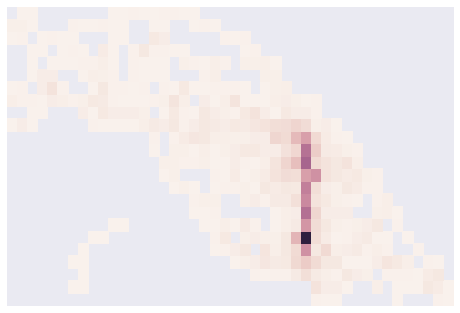

In [15]:
# Sample of plotting graphic with seaborn
# plot of Barcelona the 11th September of 2015

df0 = df[ (df['Year']== 2015) & (df['Month']== 9) & (df['Day']== 11)]
df0 = df0.groupby(['Latitude','Longitude'], as_index= False).count()           
result = df0.pivot (index='Latitude' , columns='Longitude', values='Day')

import seaborn
import seaborn as sns

sns_plot = seaborn.heatmap(result, cbar= False )

# Remove labels
sns_plot.set_ylabel('')    
sns_plot.set_xlabel('')

sns_plot.set_yticklabels('')
sns_plot.set_xticklabels('')

# Generate image

fig = sns_plot.get_figure()


# Save graphic as png
#fig.savefig("output.png")



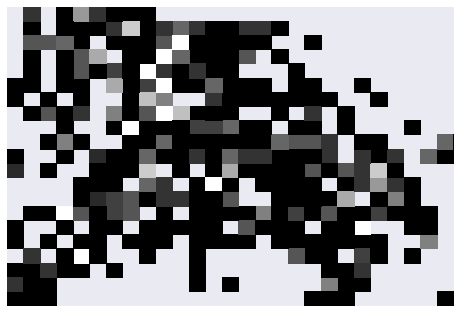

In [27]:
# Iteration to create the dataset of graphics
years = [2015]#, 2016, 2017]
months = [1,2]#,3,4,5,6,7,8,9,10,11,12]
days = [1,2,3,4,5,6,7,8,9,10]#,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
weekdays = [1,2,3,4,5]
manana = [7,8,9,10,11]
tarde = [16,17,18,19,20]

hours = manana

df0 = df[df['Activitat']=='IN_VEHICLE']
df0 = df0[(df0['Weekday']!=6) & (df0['Weekday']!=7)]
df0 = df0[(df0['Hour'].isin(hours))]

for year in years:  
  df2 = df0[df0['Year']==year]  
  for month in months:
    df3 = df2[df2['Month']==month]
    for day in days:
          df4 = df3[df3['Day']==day]
          df5 = df4.groupby(['Latitude','Longitude'], as_index= False).count()           
          result = df5.pivot (index='Latitude' , columns='Longitude', values='Day')
          try:
            sns_plot = None
            fig = None 
            sns_plot = seaborn.heatmap(result, cbar = False, cmap = 'gray')
            # Remove labels
            sns_plot.set_ylabel('')    
            sns_plot.set_xlabel('')
            sns_plot.set_yticklabels('')
            sns_plot.set_xticklabels('')
            # Generate image
            fig = sns_plot.get_figure()
            if 10 in hours:
              periodo = 'M'
            else:
              periodo = 'T'
            filename = str(year) + '_' + str(month) + '_' + str(day) + '_' + periodo + '.png' 
            fig.savefig( filename )
          except:
            pass


## Plotting data sample with Folium

In [0]:
!pip install folium geopandas             # Install folium for map visualization

import folium                             # Library to create the map
from folium import plugins                # plugin to create a heatmap

In [0]:
df0 = df[ (df['Year']== 2015) & (df['Month']== 9) & (df['Day']== 11)]
df0 = df0.groupby(['Latitude','Longitude'], as_index= False).count()           

latitude = df0.loc [ : , 'Latitude']
longitude = df0.loc [ : , 'Longitude']
total = df0.loc [ : , 'Day']

In [0]:
center_lat = 41.42
center_lon = 2.18

locationmap = folium.Map(location=[ center_lat , center_lon ], zoom_start=12) #, width=800, height=600 )
locationmap.add_child(plugins.HeatMap(zip(latitude, longitude, total), radius = 12))

locationmap